### End to End Exploratory Data analysis on Titanic *Dataset* Ninad

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style='whitegrid')

In [9]:
# !git clone 'https://github.com/HarshvardhanSingh-13/Datasets/blob/main/Titanic_Dataset'
!wget 'https://raw.githubusercontent.com/HarshvardhanSingh-13/Datasets/main/Titanic_Dataset/Titanic-Dataset.csv' -O 'Titanic-Dataset.csv'

--2025-11-17 15:02:55--  https://raw.githubusercontent.com/HarshvardhanSingh-13/Datasets/main/Titanic_Dataset/Titanic-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘Titanic-Dataset.csv’

Titanic-Dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.04s   

2025-11-17 15:02:55 (1.32 MB/s) - ‘Titanic-Dataset.csv’ saved [61194/61194]



In [10]:
df = pd.read_csv('Titanic-Dataset.csv')  # loading dataset

In [11]:
# df =pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')  #loading dataset

###Gathering basic information about data

In [12]:
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [13]:
# Database description
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [14]:
df.info()  # this is returning a series type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

#### Data Cleaning

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
age_median = df['Age'].median()
print(age_median)

28.0


In [18]:
df['Age'] = df['Age'].fillna(age_median)  # filling median value where NaN is present

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
comman_embarked = df['Embarked'].mode()[0]
comman_embarked

'S'

In [21]:
df['Embarked'] = df['Embarked'].fillna(comman_embarked)

In [22]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int) # .notna returns the present values as True where values arnt there it will show False
df.drop('Cabin',axis = 1, inplace=True)  # axis = 1 tells to drop column re-running this gives error

In [23]:
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0

Analayzing Categorical Features


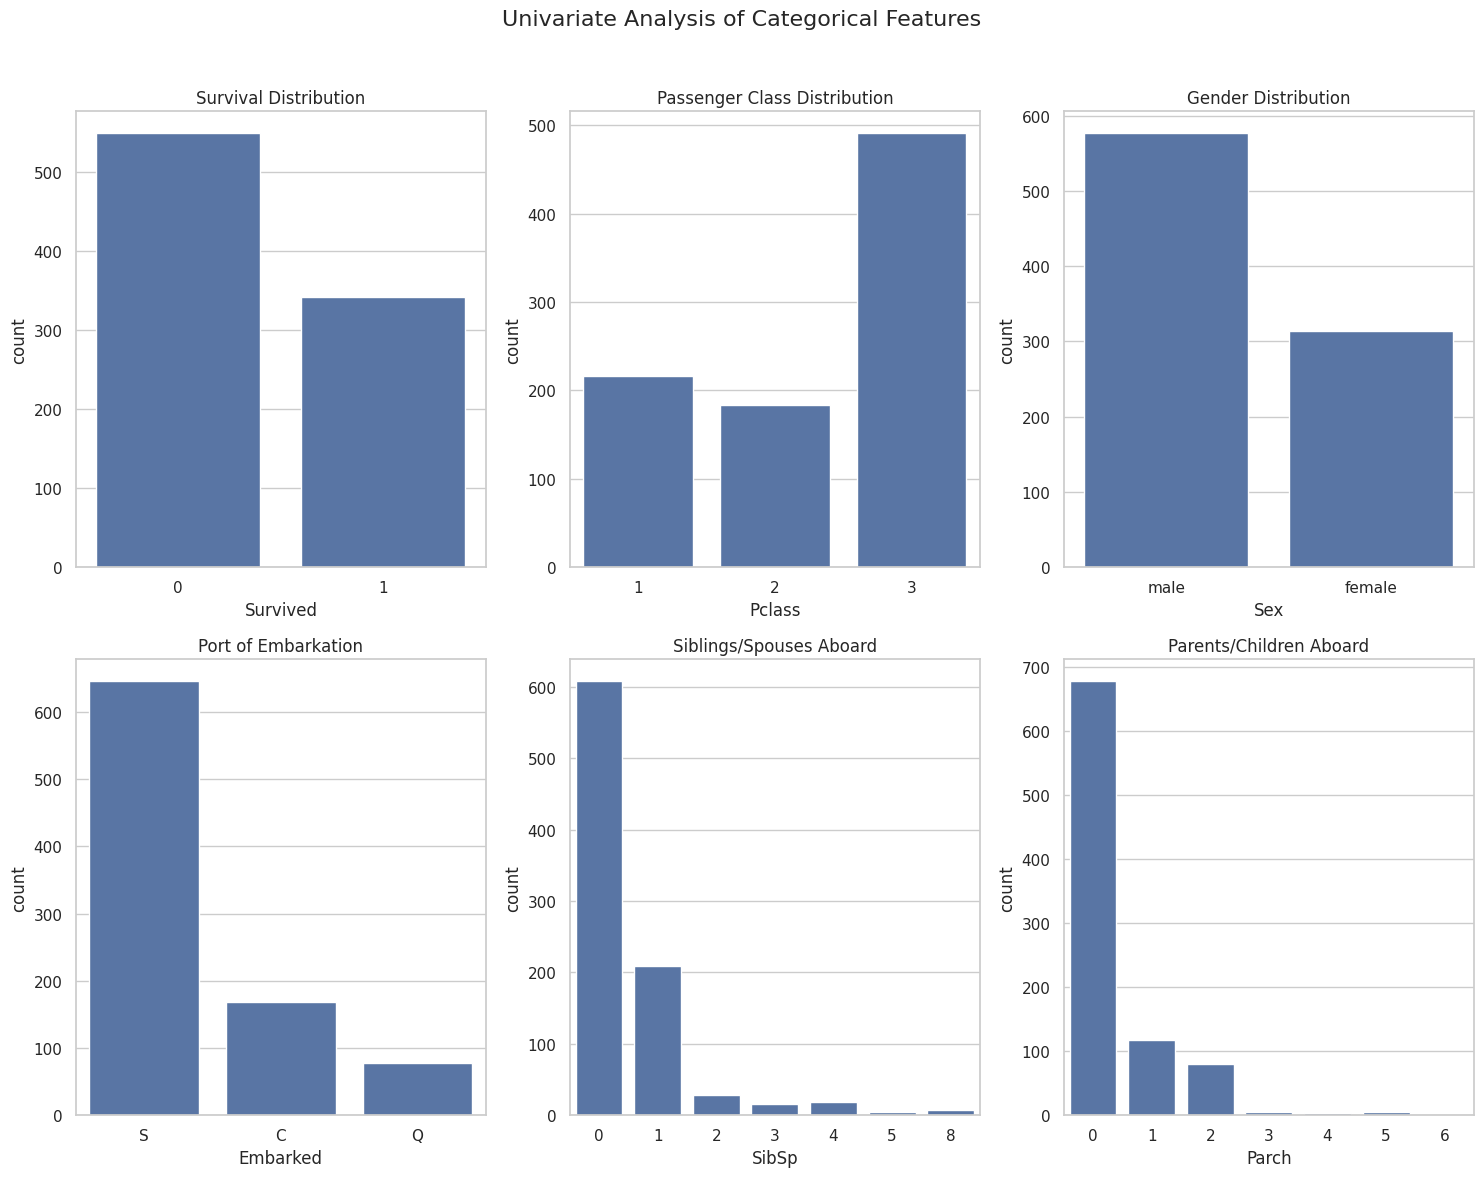

In [24]:
print('Analayzing Categorical Features')
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sb.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sb.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sb.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sb.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sb.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sb.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

####Analyzing Categorical Features

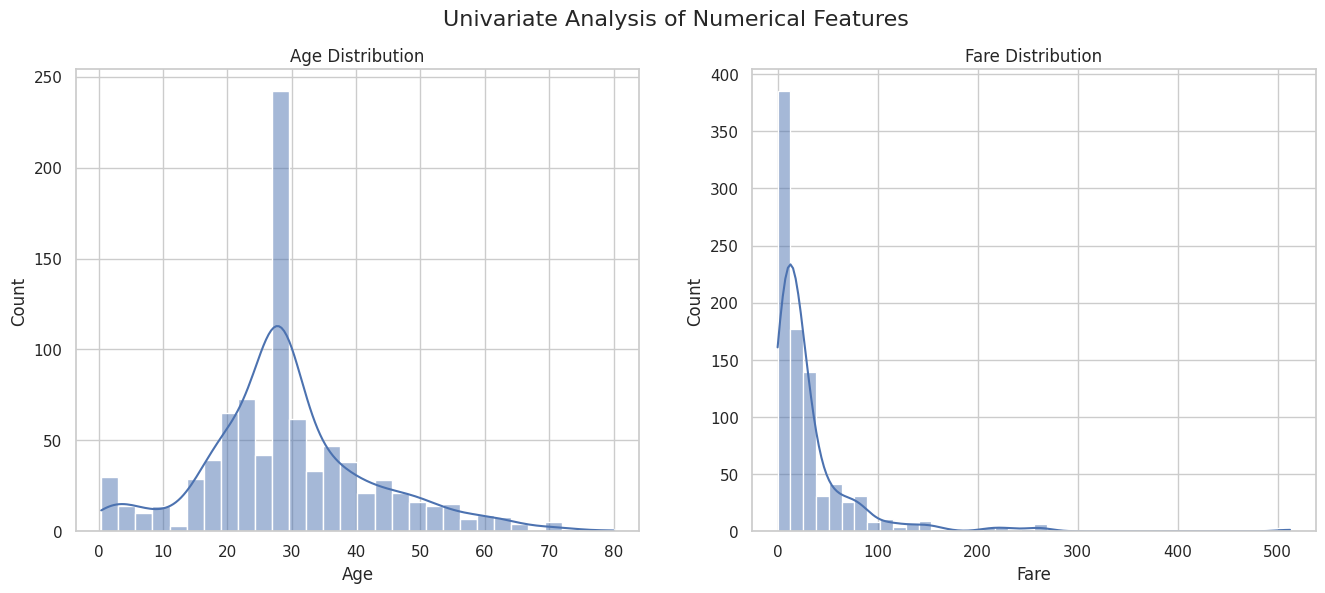

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sb.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sb.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

#### Bivariant Analysis

Bivariate Analysis: Feature vs. Survival


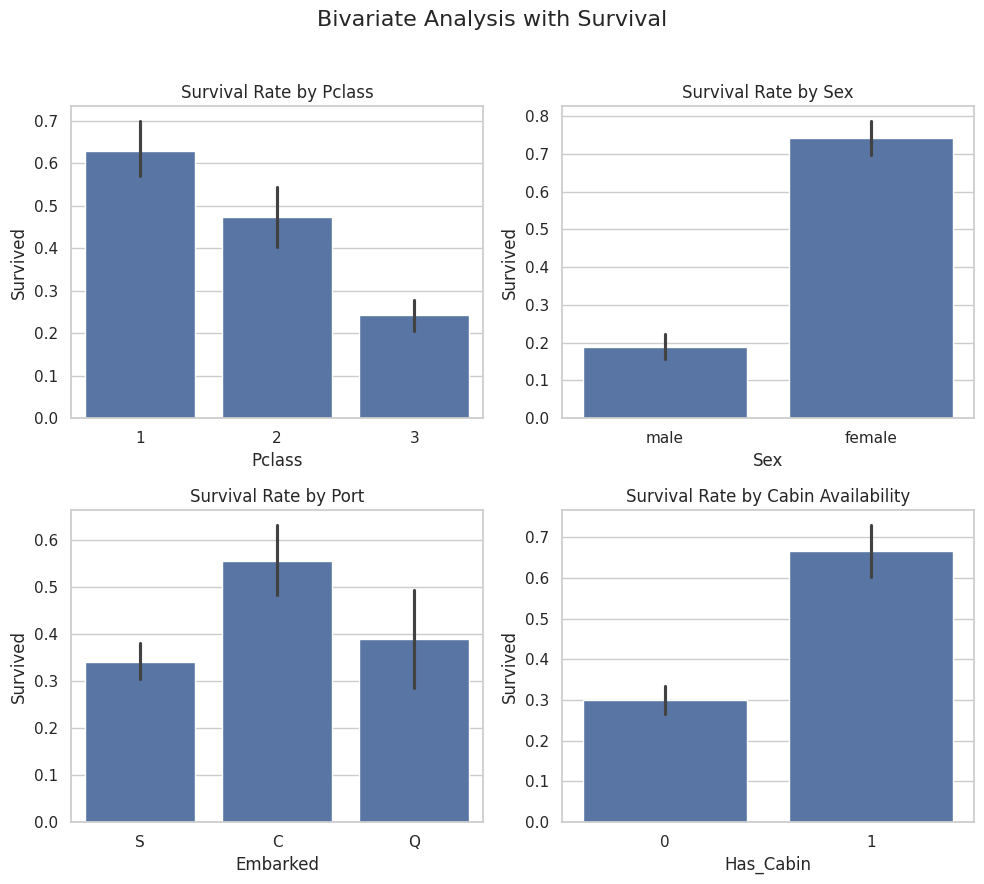

In [26]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sb.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sb.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sb.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sb.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#TODO: What is confidence interval???

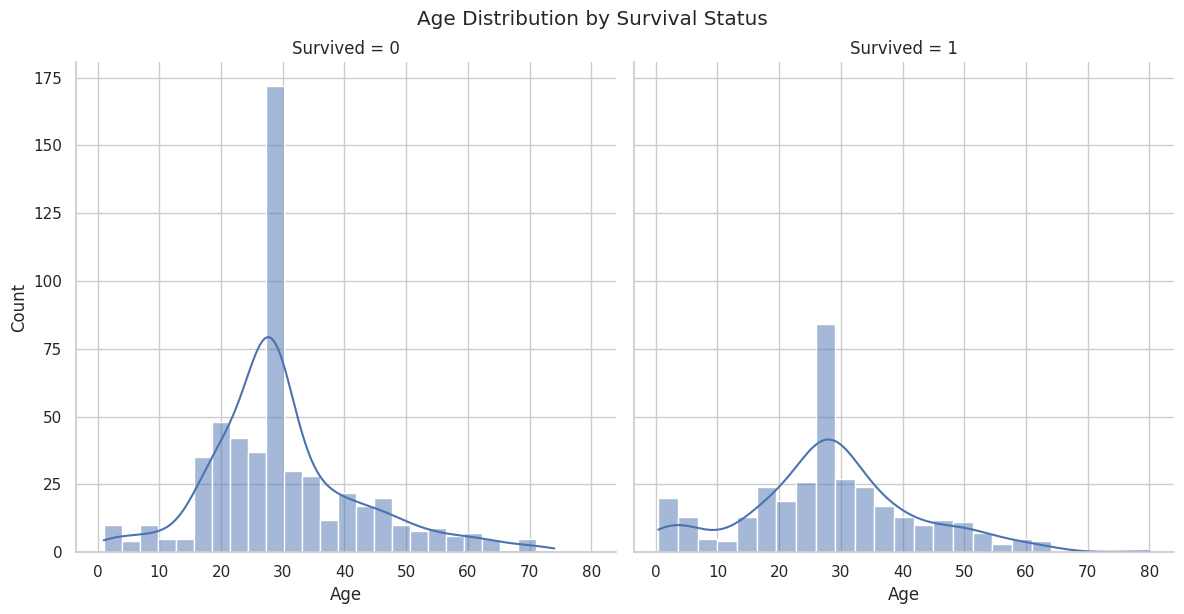

In [27]:
## Age Vs Survived

g = sb.FacetGrid(df, col='Survived', height=6)
g.map(sb.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

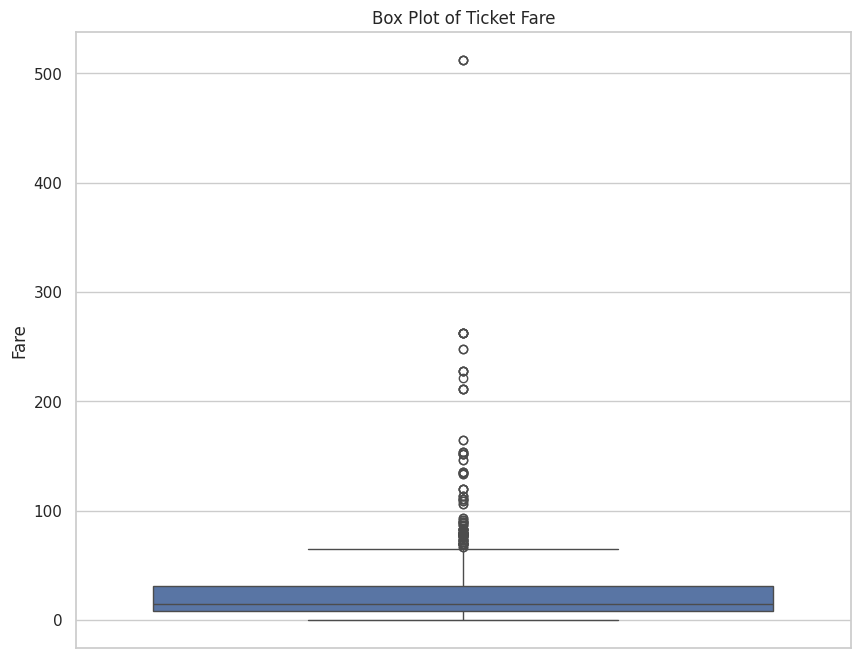

In [28]:
# Q1-- 25% | Q2--50% | Q3--75% | Q4--100%
# Interquartile range is nothing but Q1 - Q3 & anything outside that range is anamonly or outliers
plt.figure(figsize=(10,8))
sb.boxplot(y = 'Fare', data = df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

####Feature Engineering

In [29]:
df['Familysize'] = df['Parch'] + df['SibSp'] + 1 # why + 1 b'coz each record belongs to individual so that individual needs to add in his family to count as full family size

In [30]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  Familysize  
0      0         A/5 21171   7.2500        S          0           2  
1      0          PC 17599  71.2833        C          1           2  
2      0  STON/O2. 3101282   7.9250        S          0           1  
3      0            113803  53.1000        S          1           2  
4      0            373450   8.0500        S          0           1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
 12  Familysize   891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [32]:
# How to know passenger was alone?
# one way is: if he is having 0 in both sibsp & parch then he must be travelling alone..
df['Familysize'] == 1

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Familysize, Length: 891, dtype: bool

In [33]:
df['IsAlone'] = 0

In [34]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  Familysize  IsAlone  
0      0         A/5 21171   7.2500        S          0           2        0  
1      0          PC 17599  71.2833        C          1           2        0  
2      0  STON/O2. 3101282   7.9250        S          0           1        0  
3      0            113803  53.1000        S          1           2        0  
4      0            373450   8.0500        S          0           1        0

In [35]:
df.loc[df['Familysize'] == 1,'IsAlone'] = 1

In [36]:
df[['Familysize','IsAlone']]

Familysize  IsAlone
0             2        0
1             2        0
2             1        1
3             2        0
4             1        1
..          ...      ...
886           1        1
887           1        1
888           4        0
889           1        1
890           1        1

[891 rows x 2 columns]

In [37]:
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  Familysize  IsAlone  
0      0         A/5 21171   7.2500        S          0           2        0  
1      0          PC 17599  71.2833        C          1           2        0  
2      0  STON/O2. 3101282   7.9250        S          0           1        1

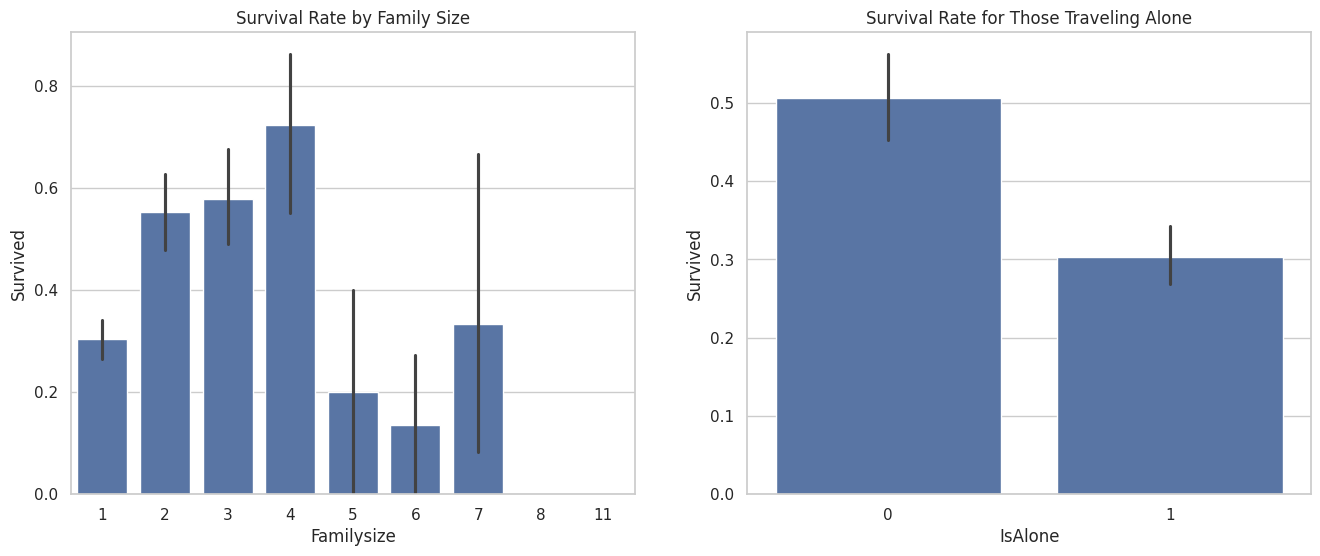

In [38]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sb.barplot(ax=axes[0], x='Familysize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sb.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

In [39]:
#3. Extract 'Title' from the 'Name' COlumn
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

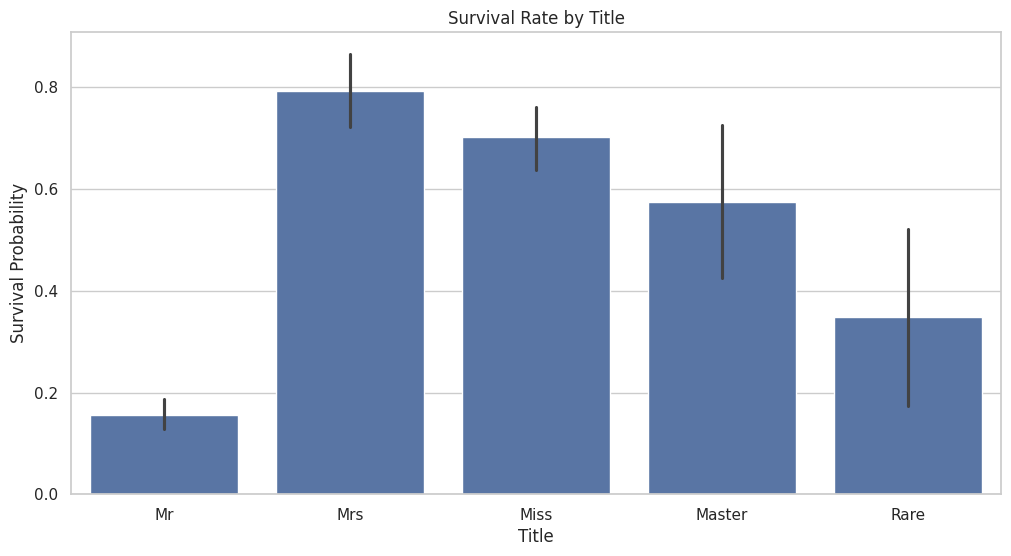

In [40]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sb.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

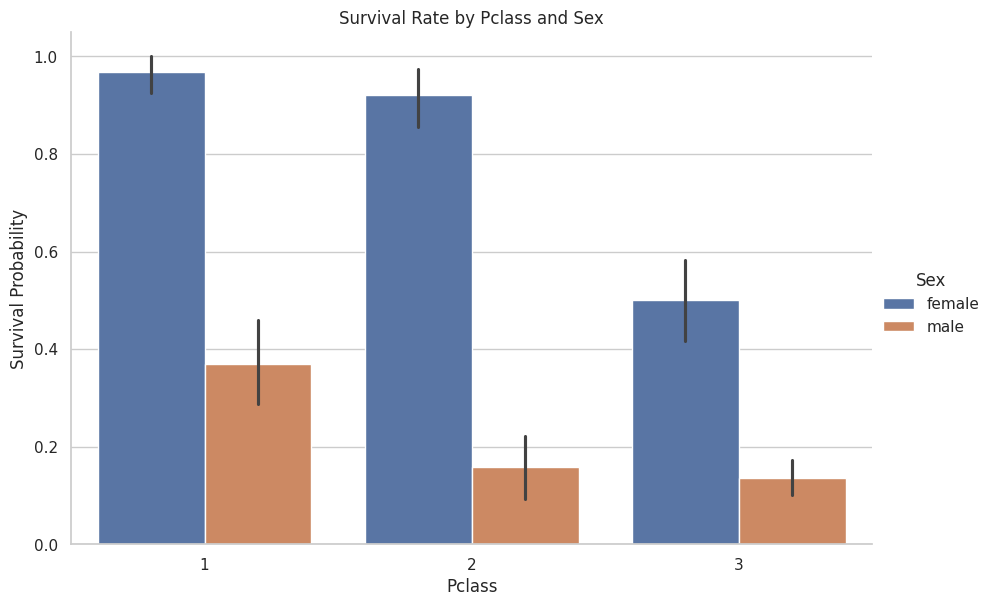

In [41]:
# Survival rate by Pclass and Sex
sb.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()


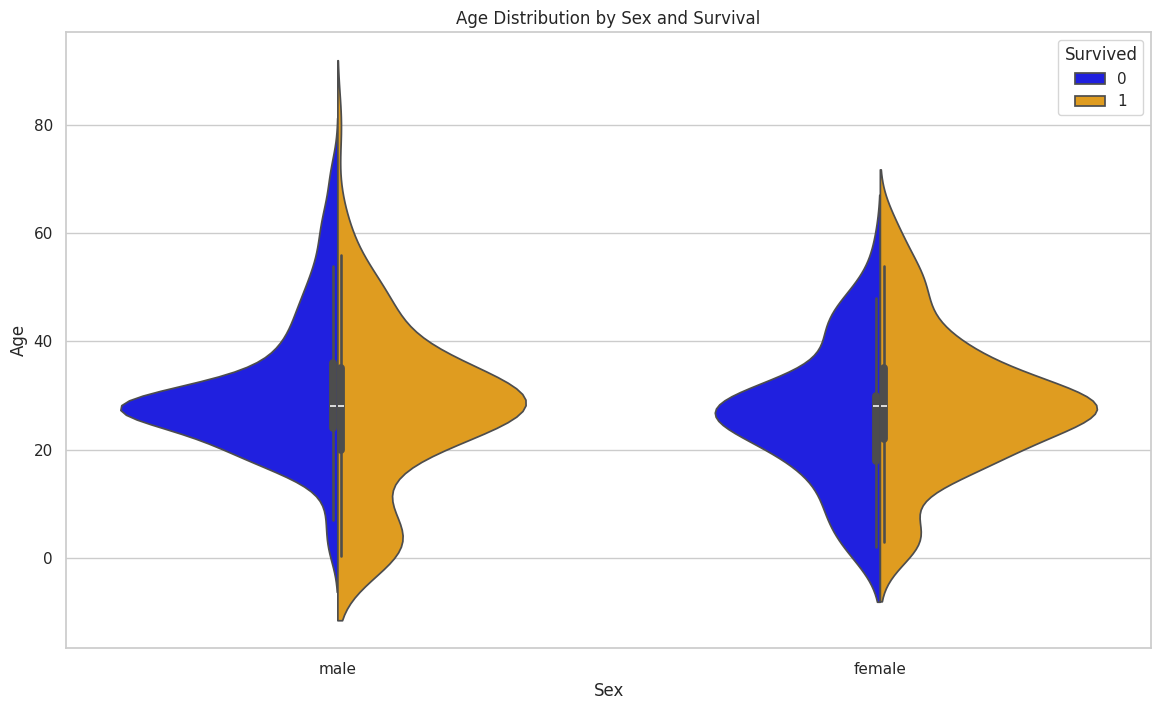

In [42]:

plt.figure(figsize=(14, 8))
sb.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

### Co relation analysis

In [43]:
# Heatmap usage

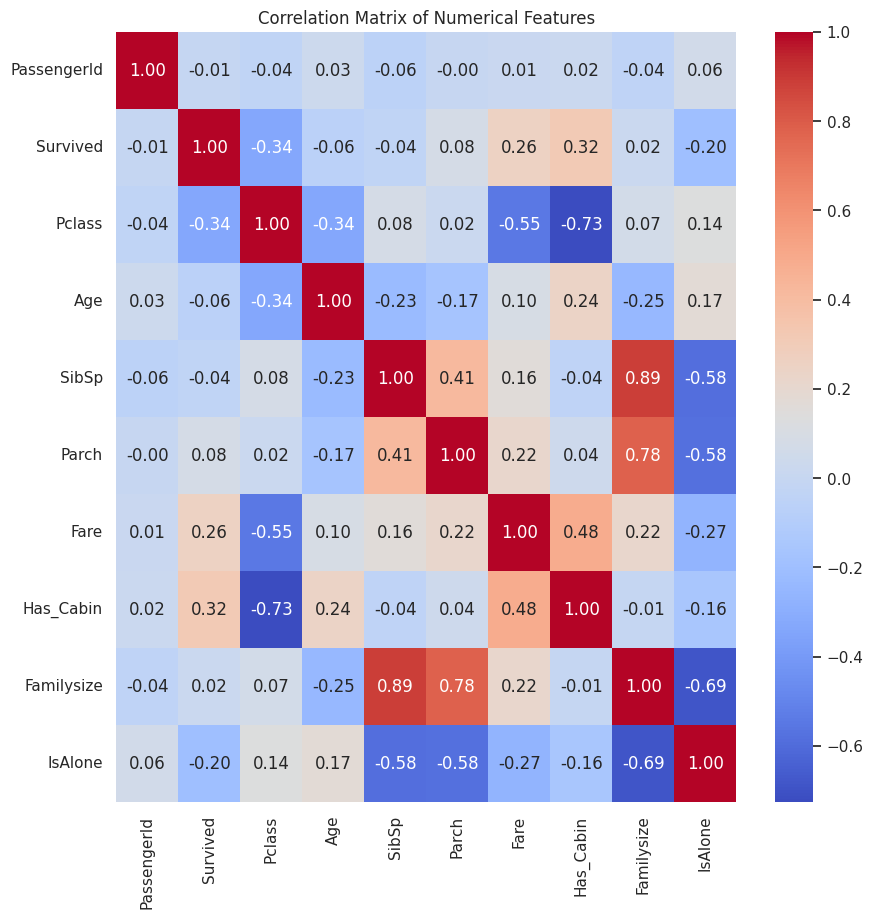

In [44]:
plt.figure(figsize=(10, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Important Findings:

Who survivied the most: Woman & childrens including Womans preferrably womans who were having 1st class ticket & Cabin reservations for the travel
Who survivied the lest: Men who were travelling alone & Men who were having 3rd class reservations.
Which factors affected outcomes: Sex,Age,Cabin,Fare usualiy in this order.


In [45]:
!pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [46]:
from ydata_profiling import ProfileReport

In [47]:
profile = ProfileReport(df=df,title='Titanic EDA report')

In [48]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 34.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
profile.to_file('Titanic EDA report_Ninad.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]